<center><h1>ML Lab3: Perceptron</h1></center>
<center><h3>Arush Sharma 16BCE1127</h3></center>

<h4>In this lab experiment, I will be implementing simple Perceptron model which is used for classifying linearly separable attributes</h4>

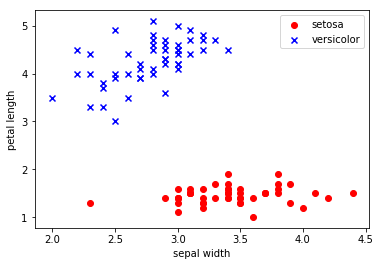

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import warnings
import numpy as np
warnings.simplefilter(action='ignore', category=FutureWarning)
iris_data=pd.read_csv("Preprocessed_datasets\\Iris_datapreprocessed.csv")

y = iris_data.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = iris_data.iloc[0:100, [1, 2]].values

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.ylabel('petal length')
plt.xlabel('sepal width')
plt.legend(loc='upper right')
plt.show()

<h4>We can see the two classes can be linearly seperated</h4>

<h3>Perceptron implementation 1 (book) </h3>

In [13]:
class Perceptron(object):
    
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
        
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

<h4>Finding the error in classification</h4>

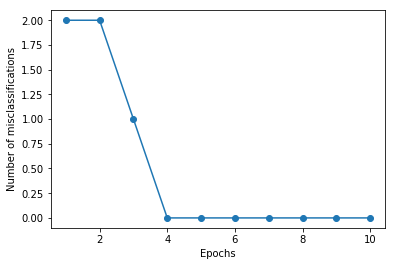

In [14]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

<h4>Defing a function which visualises the boundry of seperation by perceptron</h4>  

In [15]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

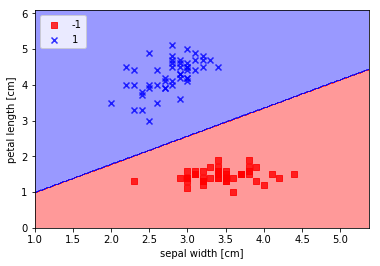

In [16]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal width [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

<h3>Perceptron implementation 2 (sklearn's Perceptron from linear_model)</h3>

In [19]:
from sklearn.linear_model import Perceptron
ppn2 = Perceptron(max_iter=40, eta0=0.01, random_state=0)
ppn2.fit(X, y)

#Using default config for the Perceptron

Perceptron(alpha=0.0001, class_weight=None, eta0=0.01, fit_intercept=True,
      max_iter=40, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

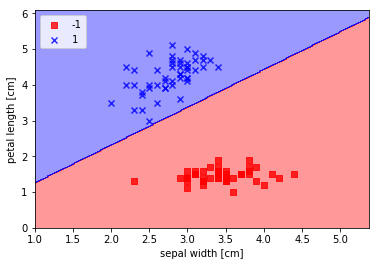

In [21]:
plot_decision_regions(X, y, classifier=ppn2)
plt.ylabel('petal length [cm]')
plt.xlabel('sepal width [cm]')
plt.legend(loc='upper left')

<p> We can see that in sklearn's implemntation of perceptron, the boundry is closer to 'x' class.</p>

<center><h1> Implementation on my Dataset</h1></center>

<p>I will be working on Melbourne Housing Dataset</p>

In [80]:
housing_data=pd.read_csv("Preprocessed_datasets\\Housing-data.csv")
#housing_data=pd.read_csv("Melbourne_housing_FULL.csv")

In [81]:
list(housing_data)

['Suburb',
 'Rooms',
 'Type',
 'Price',
 'Method',
 'SellerG',
 'Date',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'CouncilArea',
 'Lattitude',
 'Longtitude',
 'Regionname',
 'Propertycount']

<h4>Making the regionname to be either 0 or 1 to make two linearly seperable classes</h4>

In [83]:
X=housing_data['Postcode']
y=housing_data['Regionname'].copy()
#print(X)

from sklearn.linear_model import Perceptron

#ppn2.fit(x, y)
#print(list(np.unique(y)))

for i in range(len(y)):
    if(y[i]=='Eastern Metropolitan'):
        y[i]='0'
    elif(y[i]=='Eastern Victoria'):
        y[i]='0'
    elif(y[i]=='Northern Metropolitan'):
        y[i]='0'
    elif(y[i]=='Northern Victoria'):
        y[i]='0'
    elif(y[i]=='South-Eastern Metropolitan'):
        y[i]='1'
    elif(y[i]=='Southern Metropolitan'):
        y[i]='1'
    elif(y[i]=='Western Metropolitan'):
        y[i]='1'
    elif(y[i]=='Western Victoria'):
        y[i]='1'

ppn2 = Perceptron(max_iter=40, eta0=0.01, random_state=0)
 

<h4>Fitting on peceptron</h4>

In [92]:
x=[]
print(np.shape(y))
for i in range(len(y)):
    x.append([int(X[i]),int(y[i])])
x=np.array(x)
ppn2.fit(x, y)

(17659,)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.01, fit_intercept=True,
      max_iter=40, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

<h4> Visualizing the decision boundary</h4>

In [53]:
import numpy as np
from matplotlib.colors import ListedColormap
x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1

In [49]:
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02), np.arange(x2_min, x2_max, 0.02))

In [51]:
Z = ppn2.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)

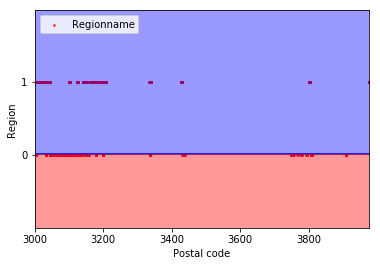

In [91]:
markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y))])
plt.scatter(housing_data['Postcode'],y,s=2,color='red')
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.xlabel('Postal code')
plt.ylabel('Region')
plt.legend(loc='upper left')

<h4>We can see that the regions have been linearly separated by  perceptron, though very poorely. The separation boundry is very close to 0.</h4>